In [88]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score
 
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN

import matplotlib.colors as colors
from itertools import cycle

def plotClustering(X, plt_labels):
    plt_colors = cycle(colors.cnames.keys())

    plt_K = np.unique(plt_labels).size

    for k in xrange(plt_K):
        color = plt_colors.next()
        mask = (plt_labels == k)
        plt.scatter(X[plt_labels == -1, 0], X[plt_labels == -1, 1], c = 'black', marker = 'o')
        plt.scatter(X[mask, 0], X[mask, 1], c=color, marker='o', s = 20)

    #plt.show()

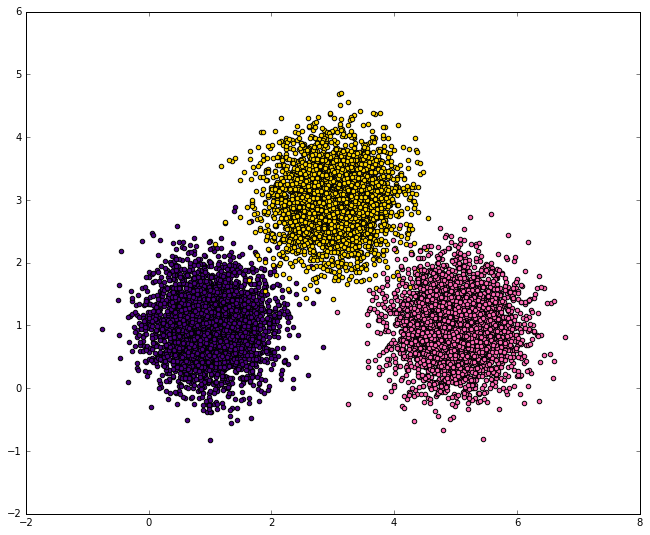

In [89]:
from sklearn import datasets

centers_ = [[1, 1], [3, 3],[5,1]]
X, labels = datasets.make_blobs(n_samples=10000, n_features=2, centers=centers_, cluster_std=0.5)

plt.figure(figsize=(11,9))
plotClustering(X, labels)

False

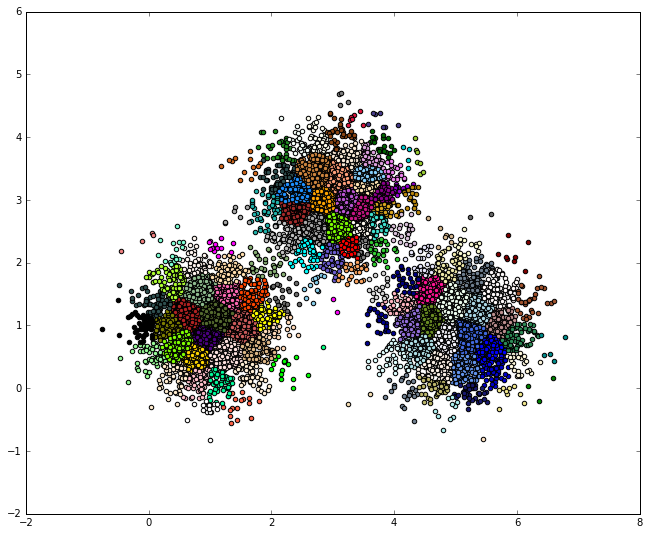

In [90]:
birch = Birch(threshold=0.25, n_clusters=None)
birch.fit(X)
plt.figure(figsize=(11,9))
plotClustering(X, birch.labels_)
birch.root_.is_leaf

[[ 0.99421318  0.99561227]
 [ 4.20583024  2.24737254]
 [ 2.91438834  3.02863587]
 [ 5.03344326  0.87660296]]


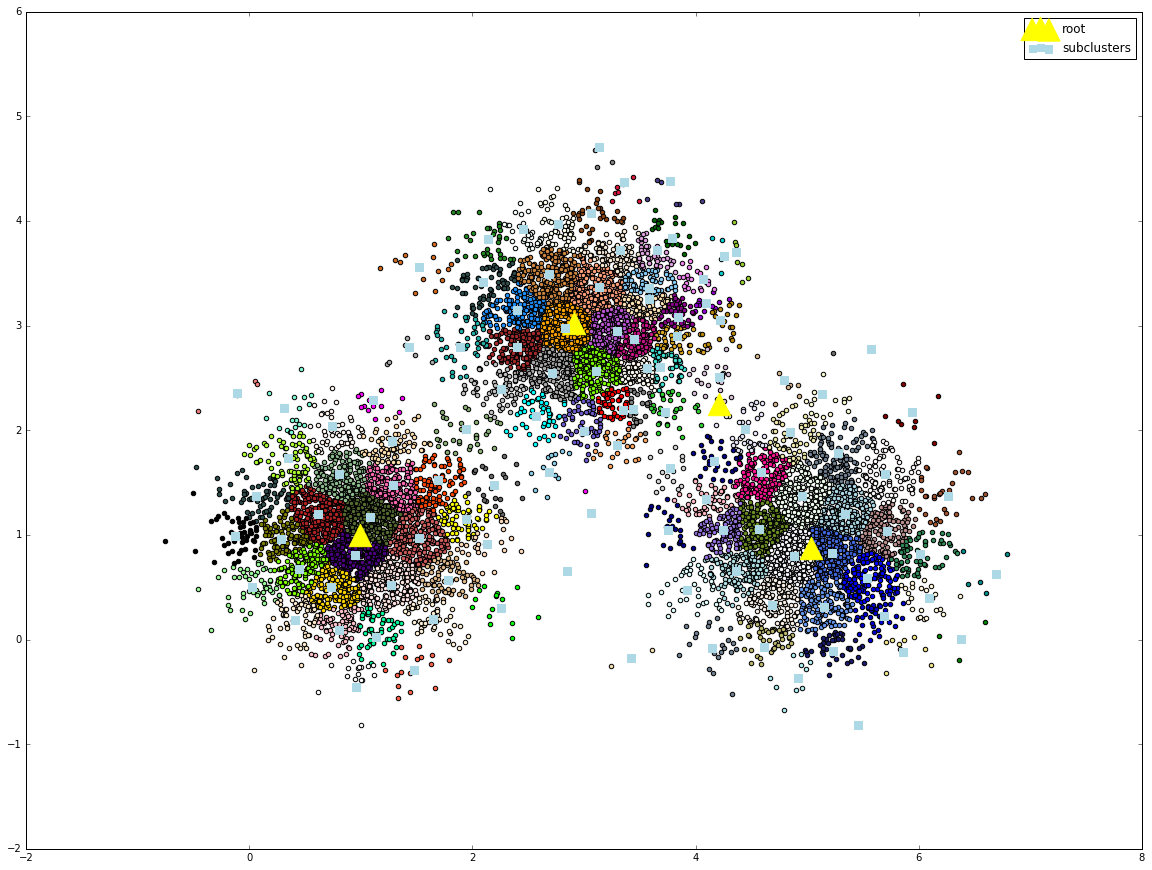

In [91]:
print birch.root_.centroids_
plt.figure(figsize=(20,15))
plotClustering(X, birch.labels_)
plt.scatter(birch.root_.centroids_[:,0], birch.root_.centroids_[:,1],marker = '^',color = 'yellow', s = 500, label = 'root')
plt.scatter(birch.subcluster_centers_[:,0], birch.subcluster_centers_[:,1],marker = 's',color = 'lightblue', s = 50, label = 'subclusters')
plt.legend()
plt.show()

True
True
True
True


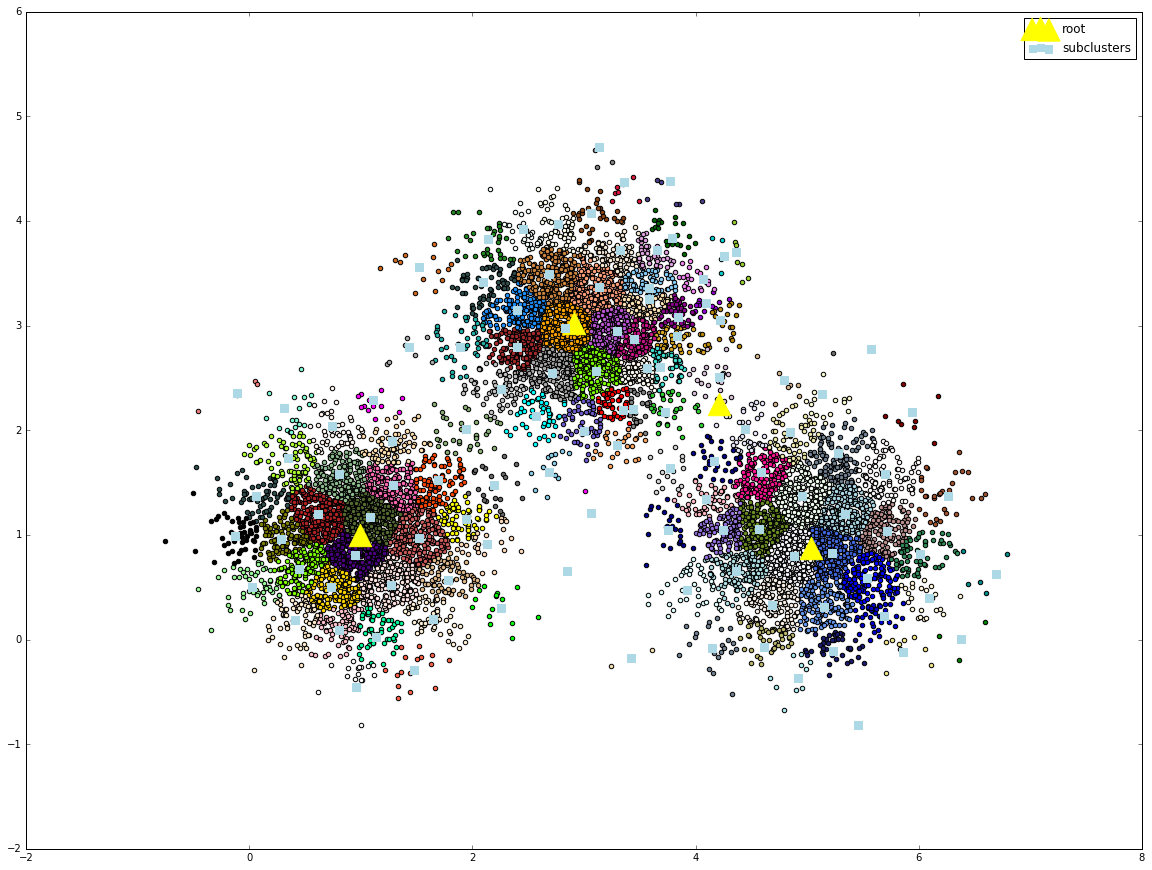

In [92]:
#print birch.root_.centroids_
plt.figure(figsize=(20,15))
plotClustering(X, birch.labels_)
plt.scatter(birch.root_.centroids_[:,0], birch.root_.centroids_[:,1],marker = '^',color = 'yellow', s = 500, label = 'root')
sc = np.vstack([sb.child_.centroids_ for sb in birch.root_.subclusters_])
for sb in birch.root_.subclusters_:
    print sb.child_.is_leaf
#print sc
plt.scatter(sc[:,0], sc[:,1],marker = 's',color = 'lightblue', s = 50, label = 'subclusters')
plt.legend()
plt.show()

False

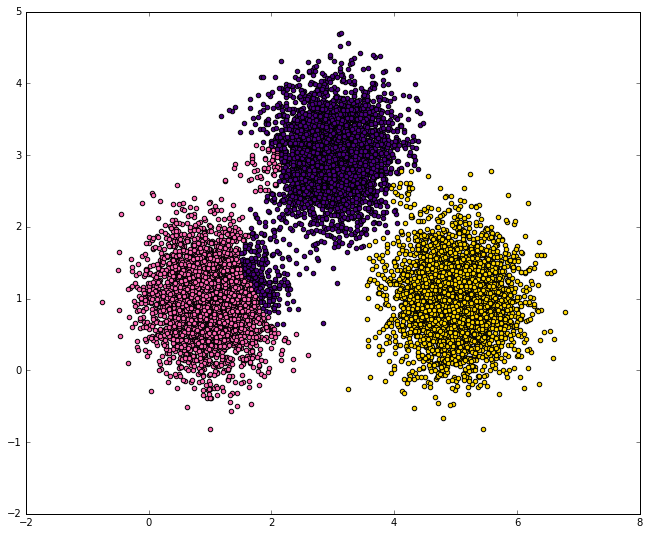

In [93]:
birch = Birch(threshold=0.25, n_clusters=3)
birch.fit(X)
plt.figure(figsize=(11,9))
plotClustering(X, birch.labels_)
birch.root_.is_leaf

c - n_clusters - ile grup ma byc na koncu - po dokonaniu podziału kazdej danej przyporzadkowuje jej numer klastra i grupuje numery do tylu grup ilu zaznaczylismy => stad odwarza podzial na dokladnie tyle grup ile chcielismy
jesli n-cluster jest nie podany dostaemy tyle ile wszystkich subclastrow w lisciach